In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

In [371]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
options = webdriver.ChromeOptions()
options.add_experimental_option('excludeSwitches', ['enable-automation']) 
driver = webdriver.Chrome('/Users/Hasitha/Documents/GitHub/web-scraping-python/src/chromedriver',options=options)
driver.implicitly_wait(20)

In [41]:
#url = "https://www.propertyvalue.com.au/explore/Greater%20Dandenong-VIC"

url = 'https://www.jbhifi.com.au/products/ps4-playstation-4-1tb-pro-console'
driver.get(url)

In [52]:
soup = BeautifulSoup(driver.page_source, 'lxml')

price = soup.find('span', attrs={'class': 'price'})
print(price.text.strip())


$519


In [58]:
base_url = 'https://www.domain.com.au/'

url = 'https://www.domain.com.au/sold-listings/narre-warren-vic-3805/?excludepricewithheld=2&page=1'
driver.get(url)

In [382]:
google_search = driver.find_element_by_xpath('/html/body/div[2]/div/div/div[3]/div[2]/div[1]/div[3]/div[1]/div/a')
google_search.click()

In [349]:
soup = BeautifulSoup(driver.page_source, 'lxml')

price = soup.find_all('p', attrs = {'class':'css-mgq8yx'})
address = soup.find_all('span', attrs={'class':'css-1fclaxo'})
details = soup.find_all('span', attrs={'class': 'css-1rzse3v'})
date = soup.find_all('span', attrs={'class': 'css-1nj9ymt'})
property_type = soup.find_all('span', attrs={'class': 'css-693528'})

#all_properties = soup.find_all('li', attrs={'class': 'css-1b4kfhp'})

In [173]:
date_list = []

for row in date:
    date_list.append('-'.join(row.getText().split()[4:]))

In [337]:
price_list = []

for row in price:
    price_list.append(row.getText().strip()[1:].replace(',',''))

In [299]:
address_list = []
count = 0
for row in address:
    if (int(count)%2)== 0:
        address_list.append(row.getText().strip()[:-1])
    count = count+1

In [361]:
property_type_list=[]

for row in property_type:
    
    property_type_list.append(row.getText().strip())

In [320]:
details_list=[]
beds = []
baths = []
parking = []
area = []

for row in details:
    #print (row.getText().split())
    details_list.append(row.getText().strip().split())

    
status = False

for item in details_list:
    
    if len(item) == 2:
        
        if item[1] == 'Beds' and status == True:
            area.append('0')
            status = False
        if item[1] == 'Beds':
            beds.append(item[0])
        elif item[1] == 'Bath' or item[1] == 'Baths':
            baths.append(item[0])
        elif item[1] == 'Parking':
            status = True
            if item[0].isdigit():
                parking.append(item[0])
            else:
                parking.append('0')
    elif len(item)==1: 
    
        area.append(item[0][:-2])
        status = False
    

In [363]:
df = pd.DataFrame({'address':address_list,'property_type':property_type_list,'date':date_list,'beds':beds,'baths':baths,
        'parking':parking,'area':area,'price':price_list})

In [364]:
df[['beds', 'baths','parking','area','price']] = df[['beds', 'baths','parking','area','price']].apply(pd.to_numeric)

In [365]:
df.head()

,address,property_type,date,beds,baths,parking,area,price
0,76 Kendall Drive,House,30-Apr-2020,5,2,2,719,700000
1,64 Elstar Road,House,27-Apr-2020,3,2,2,390,530000
2,1/57 Amber Crescent,House,27-Apr-2020,2,1,1,0,437000
3,17 Wallowa Crescent,House,24-Apr-2020,3,1,4,676,510000
4,34A Blackwood Drive,House,24-Apr-2020,3,2,2,255,530000


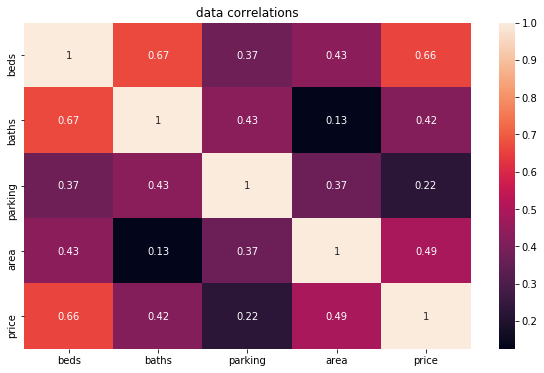

In [374]:
plt.figure(figsize=(10,6))
plt.title('data correlations')
sns.heatmap(df.corr(), annot=True)

In [327]:
df.dtypes

address    object
price      object
date       object
beds        int64
baths       int64
parking     int64
area        int64
dtype: object

from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())